## Manufacturing Dataset

This dataset contains information related to a manufacturing process, offering insights into various process parameters and product quality. In this Markdown cell, we will provide a brief overview of the dataset's structure and its key components.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Practice-1 Manufacturing.csv')
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [3]:
df.shape

(3957, 6)

In [4]:
# sns.pairplot(df)

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return (vif)

In [6]:
x = df.drop('Quality Rating', axis=1)
calc_vif(x)

,VIF
0,113.050204
1,49.349434
2,72.745768
3,764.593283
4,219.003134


In [7]:
x.shape

(3957, 5)

In [8]:
y = df['Quality Rating']
y.shape

(3957,)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.fit_transform(x_test)

In [11]:
X_train_poly.shape, X_test_poly.shape

((3165, 126), (792, 126))

In [12]:
y_train = np.array(y_train).reshape(-1,)

In [13]:
y_train.shape

(3165,)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test_poly)

In [16]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = metrics.root_mean_squared_error(y_test, y_pred)
print('R squared: {:.2f}'.format(metrics.r2_score(y_test, y_pred)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Squared Error:', meanSqErr)
print('Root Mean Squared Error:', rootMeanSqErr)


R squared: 0.99
Mean Absolute Error: 0.7389318140608127
Mean Squared Error: 1.4036338330325098
Root Mean Squared Error: 1.1847505362026682


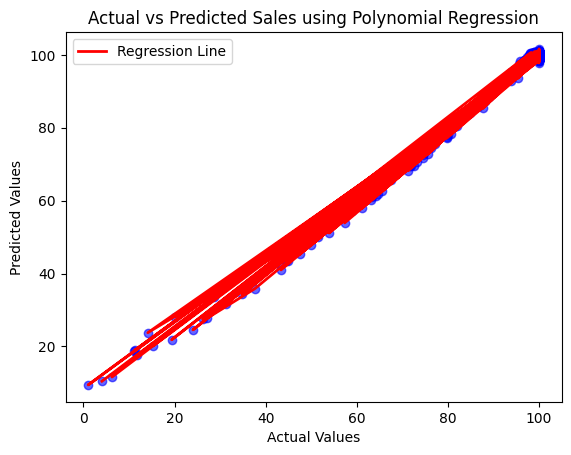

In [17]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot(y_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Actual vs Predicted Sales using Polynomial Regression")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [18]:
sorted_idx = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

In [20]:
x_test_sorted = x_test[sorted_idx]

KeyError: "None of [Index([ 89,   0, 263, 493, 139, 331,  54, 526, 282, 101,\n       ...\n       712, 423, 497, 708, 291, 293, 296, 299, 241,  83],\n      dtype='int64', length=792)] are in the [columns]"

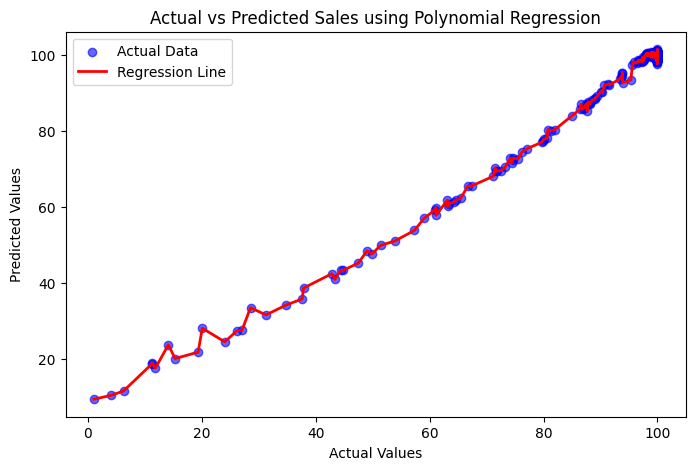

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Actual Data")
plt.plot(y_test_sorted, y_pred_sorted, color='red', linewidth=2, label="Regression Line")
plt.title("Actual vs Predicted Sales using Polynomial Regression")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()